___
# Ciência dos Dados - PROJETO 1

## André Neustein
___

## TÍTULO DO SEU PROJETO

# ___
## Introdução


Quero entender como a renda domiciliar per capita,  interferia no planejamento alimentar em 2009 e como esses, juntos, interferiam na saúde alimentar em 2009.

___
## Análise e Resultados

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [2]:
print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Elcio\Desktop\FACULDADE\2° SEMESTRE\CIENCIAS DOS DADOS\cieciadosdados


In [3]:
#Se usar o arquivo descompactado
dados = pd.read_csv('DOM2009.csv',sep=',')

#Se usar o arquivo compactado como está no dropbox púbico
#pd.read_csv('DOM2015csv.zip', compression='zip', header=0, sep=',', quotechar='"')


In [4]:
#selecionando as colunas
dadosPI = dados[dados.UF == 22].loc[:,{"V0221",'V0224','V0228','V0229','V4621','V4624','V2111','V2113','V2103','V2105','V2107','V2109','V0105'}]
#filtrando os dados
dadosPI = dadosPI[pd.notnull(dadosPI.V0229)]
dadosPI = dadosPI[pd.notnull(dadosPI.V2111)]
dadosPI = dadosPI[dadosPI.V4621!=999999999999]
#transformando as respostas numéricas em respostas
dadosPI.V0229=dadosPI.V0229.astype('category')
dadosPI.V0229.cat.categories = (['Sim','Não'])
dadosPI.V0224=dadosPI.V0224.astype('category')
dadosPI.V0224.cat.categories = (['Sim','Não'])
dadosPI.V0221=dadosPI.V0221.astype('category')
dadosPI.V0221.cat.categories = (['Sim','Não'])
dadosPI.V0228=dadosPI.V0228.astype('category')
dadosPI.V0228.cat.categories = (['Sim, de 2 portas','Sim, de 1 porta','Não'])
dadosPI.V4624=dadosPI.V4624.astype('category')
dadosPI.V4624.cat.categories = (['Rede geral com canalização interna','Poço ou nascente com canalização interna','Outra procedência com canalização interna','Rede geral sem canalização interna','Poço ou nascente sem canalização interna','Outra procedencia sem calização'])
dadosPI.V2107=dadosPI.V2107.astype('category')
dadosPI.V2107.cat.categories = (['Sim','Não'])
dadosPI.V2105=dadosPI.V2105.astype('category')
dadosPI.V2105.cat.categories = (['Sim','Não'])
dadosPI.V2109=dadosPI.V2109.astype('category')
dadosPI.V2109.cat.categories = (['Sim','Não'])
dadosPI.V2111=dadosPI.V2111.astype('category')
dadosPI.V2111.cat.categories = (['Sim','Não'])
dadosPI.V2113=dadosPI.V2113.astype('category')
dadosPI.V2113.cat.categories = (['Sim','Não'])
dadosPI.V2103=dadosPI.V2103.astype('category')
dadosPI.V2103.cat.categories = (['Sim','Não'])
#mudando o nome das colunas
dadosPI = dadosPI.rename (columns = {"V0229":"Tem frezeer"})
dadosPI = dadosPI.rename (columns = {"V0224":"Tem filtro de água"})
dadosPI = dadosPI.rename (columns = {"V0221":"Tem fogão de duas ou mais bocas"})
dadosPI = dadosPI.rename (columns = {"V0228":"Tem geladeira"})
dadosPI = dadosPI.rename (columns = {"V4624":"Forma de abastecimento de água"})
dadosPI = dadosPI.rename (columns = {"V4621":"Renda mensal domiciliar per capita"})
dadosPI = dadosPI.rename (columns = {"V2107":"Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada"})
dadosPI = dadosPI.rename (columns = {"V2105":"Os alimentos acabaram antes que os moradores deste domicílio tivessem dinheiro para comprar mais comida"})
dadosPI = dadosPI.rename (columns = {"V2109":"Os moradores deste domicílio comeram apenas alguns alimentos que ainda tinham porque o dinheiro acabou"})
dadosPI = dadosPI.rename (columns = {"V2111":"Diminuiu a quantidade de comida por falta de dinheiro"})
dadosPI = dadosPI.rename (columns = {"V2113":"Ja deixou de fazer refeição por causa de dinheiro"})
dadosPI = dadosPI.rename (columns = {"V0105":"Total de moradores"})
dadosPI = dadosPI.rename (columns = {"V2103":"Preocupação de que os alimentos acabem antes de comprar mais"})
dadosPI

,Os alimentos acabaram antes que os moradores deste domicílio tivessem dinheiro para comprar mais comida,Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada,Tem frezeer,Total de moradores,Renda mensal domiciliar per capita,Diminuiu a quantidade de comida por falta de dinheiro,Ja deixou de fazer refeição por causa de dinheiro,Tem geladeira,Preocupação de que os alimentos acabem antes de comprar mais,Tem fogão de duas ou mais bocas,Tem filtro de água,Forma de abastecimento de água,Os moradores deste domicílio comeram apenas alguns alimentos que ainda tinham porque o dinheiro acabou
20668,Sim,Sim,Não,2.0,210.0,Sim,Não,"Sim, de 2 portas",Sim,Sim,Não,Rede geral com canalização interna,Sim
20671,Não,Não,Não,5.0,26.0,Não,Não,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Não
20675,Não,Não,Não,2.0,345.0,Não,Não,Não,Sim,Sim,Sim,Rede geral com canalização interna,Não
20678,Sim,Sim,Não,3.0,78.0,Não,Não,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim
20679,Sim,Sim,Não,1.0,0.0,Sim,Sim,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Sim
20683,Sim,Sim,Não,4.0,66.0,Sim,Não,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim
20684,Sim,Não,Não,5.0,140.0,Sim,Não,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Sim
20685,Sim,Sim,Não,3.0,0.0,Sim,Não,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Sim
20686,Sim,Sim,Não,1.0,465.0,Sim,Sim,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim
20688,Sim,Sim,Não,3.0,200.0,Sim,Sim,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim


In [5]:
dadosPI["Renda mensal domiciliar per capita"].describe()

count     943.000000
mean      270.145281
std       275.242034
min         0.000000
25%       105.000000
50%       198.000000
75%       347.000000
max      3340.000000
Name: Renda mensal domiciliar per capita, dtype: float64

In [6]:
#transformar renda em faixas
dadosPI.loc[dadosPI["Renda mensal domiciliar per capita"]<= 81, "classe social"] = "Ext baixa"
dadosPI.loc[(dadosPI["Renda mensal domiciliar per capita"] > 81) & (dadosPI["Renda mensal domiciliar per capita"] <= 291), "classe social"] = "Baixa"
dadosPI.loc[(dadosPI["Renda mensal domiciliar per capita"] > 291) & (dadosPI["Renda mensal domiciliar per capita"] <= 441), "classe social"] = "Med Baixa"
dadosPI.loc[(dadosPI["Renda mensal domiciliar per capita"] > 441) & (dadosPI["Renda mensal domiciliar per capita"] <= 641), "classe social"] = "Média"
dadosPI.loc[(dadosPI["Renda mensal domiciliar per capita"] > 641) & (dadosPI["Renda mensal domiciliar per capita"] <= 1019), "classe social"] = "Med Alta"
dadosPI.loc[dadosPI["Renda mensal domiciliar per capita"] > 1019, "classe social"] = "Alta"

In [7]:
dadosPI

,Os alimentos acabaram antes que os moradores deste domicílio tivessem dinheiro para comprar mais comida,Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada,Tem frezeer,Total de moradores,Renda mensal domiciliar per capita,Diminuiu a quantidade de comida por falta de dinheiro,Ja deixou de fazer refeição por causa de dinheiro,Tem geladeira,Preocupação de que os alimentos acabem antes de comprar mais,Tem fogão de duas ou mais bocas,Tem filtro de água,Forma de abastecimento de água,Os moradores deste domicílio comeram apenas alguns alimentos que ainda tinham porque o dinheiro acabou,classe social
20668,Sim,Sim,Não,2.0,210.0,Sim,Não,"Sim, de 2 portas",Sim,Sim,Não,Rede geral com canalização interna,Sim,Baixa
20671,Não,Não,Não,5.0,26.0,Não,Não,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Não,Ext baixa
20675,Não,Não,Não,2.0,345.0,Não,Não,Não,Sim,Sim,Sim,Rede geral com canalização interna,Não,Med Baixa
20678,Sim,Sim,Não,3.0,78.0,Não,Não,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim,Ext baixa
20679,Sim,Sim,Não,1.0,0.0,Sim,Sim,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Sim,Ext baixa
20683,Sim,Sim,Não,4.0,66.0,Sim,Não,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim,Ext baixa
20684,Sim,Não,Não,5.0,140.0,Sim,Não,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Sim,Baixa
20685,Sim,Sim,Não,3.0,0.0,Sim,Não,"Sim, de 1 porta",Sim,Sim,Sim,Rede geral com canalização interna,Sim,Ext baixa
20686,Sim,Sim,Não,1.0,465.0,Sim,Sim,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim,Média
20688,Sim,Sim,Não,3.0,200.0,Sim,Sim,"Sim, de 1 porta",Sim,Sim,Não,Rede geral com canalização interna,Sim,Baixa


In [8]:
dadosPI["classe social"].value_counts()

Baixa        472
Ext baixa    169
Med Baixa    130
Média        115
Med Alta      40
Alta          17
Name: classe social, dtype: int64

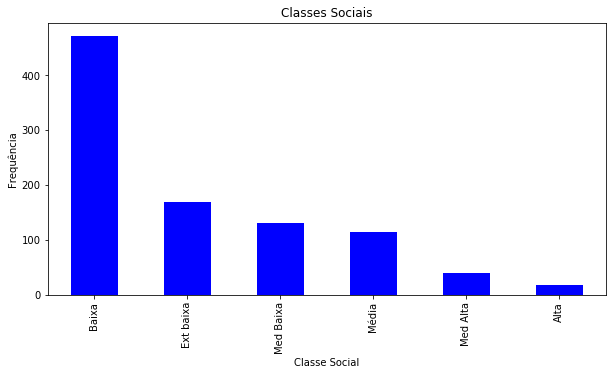

In [28]:
#dadosPI["classe social"] = dadosPI["classe social"].astype('category')
graf1 = dadosPI["classe social"].value_counts()
graf1.plot (kind='bar', color=('blue'), figsize=(10,5))
plt.ylabel('Frequência')
plt.xlabel('Classe Social')
plt.title("Classes Sociais")

In [10]:
#cruzar faixa de renda e ficar sem dinheiro para alimentaçao saudavel
tab2 = pd.crosstab(dadosPI["classe social"], dadosPI["Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada"])
tab2

Os moradores ficaram sem dinheiro para ter uma alimentação saudável e variada,Sim,Não
classe social,,
Alta,6,11
Baixa,369,103
Ext baixa,150,19
Med Alta,19,21
Med Baixa,91,39
Média,71,44


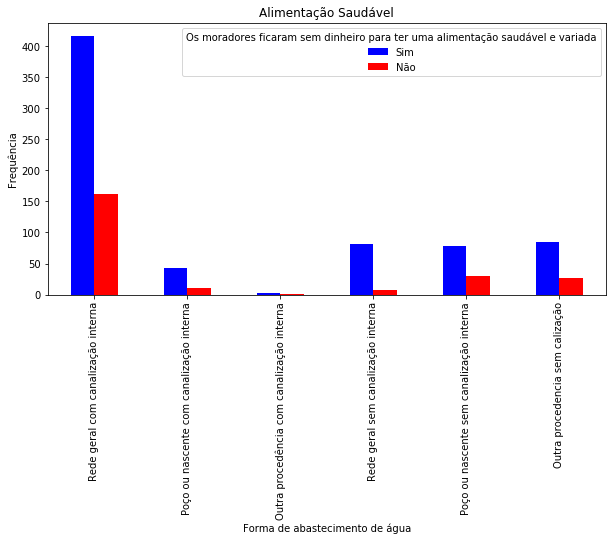

In [29]:
graf2 = tab2
graf2.plot (kind='bar', color=('blue','red'),figsize=(10,5))
plt.ylabel('Frequência')
plt.title("Alimentação Saudável")

In [12]:
#cruzar faixa de renda e preocupação de acabar o alimento antes de comprar mais
tab3 = pd.crosstab(dadosPI["classe social"], dadosPI["Preocupação de que os alimentos acabem antes de comprar mais"])
tab3

Preocupação de que os alimentos acabem antes de comprar mais,Sim,Não
classe social,,
Alta,11,6
Baixa,412,60
Ext baixa,152,17
Med Alta,33,7
Med Baixa,113,17
Média,100,15


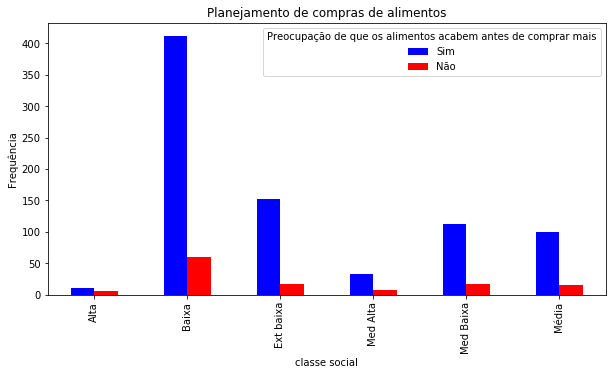

In [30]:
graf3 = tab3
graf3.plot (kind='bar', color=('blue','red'),figsize=(10,5))
plt.ylabel('Frequência')
plt.title("Planejamento de compras de alimentos")

In [14]:
#cruzar faixa de renda, frezeer e geladeira
tab4 = pd.crosstab(dadosPI["classe social"], dadosPI["Tem geladeira"])
tab4

Tem geladeira,"Sim, de 2 portas","Sim, de 1 porta",Não
classe social,,,
Alta,7,9,1
Baixa,19,355,98
Ext baixa,2,101,66
Med Alta,13,25,2
Med Baixa,13,93,24
Média,9,88,18


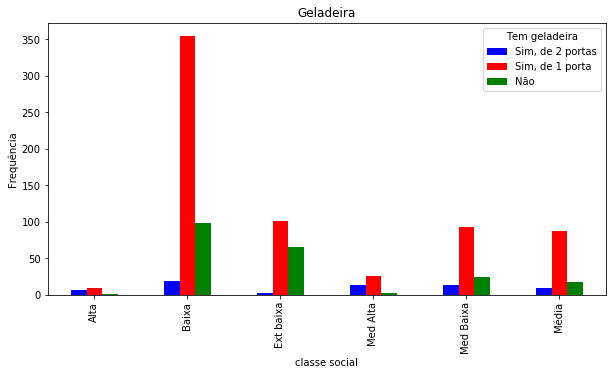

In [32]:
graf4 = tab4
graf4.plot (kind='bar', color=('blue','red','green'),figsize=(10,5))
plt.title("Geladeira")
plt.ylabel('Frequência')

In [16]:
tab5 = pd.crosstab(dadosPI["classe social"], dadosPI["Tem frezeer"])
tab5

Tem frezeer,Sim,Não
classe social,,
Alta,4,13
Baixa,13,459
Ext baixa,2,167
Med Alta,3,37
Med Baixa,7,123
Média,6,109


In [25]:
dadosPI["Tem frezeer"].value_counts()

Não    908
Sim     35
Name: Tem frezeer, dtype: int64

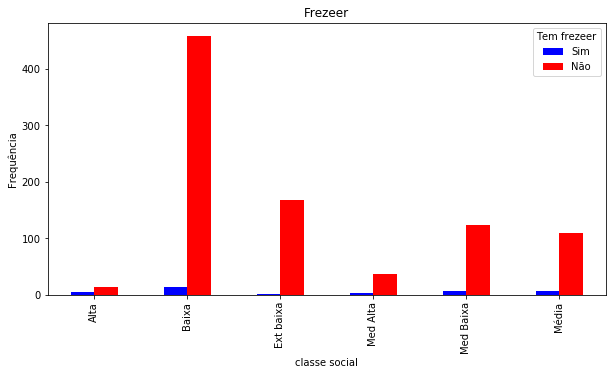

In [35]:
graf5 = tab5
graf5.plot (kind='bar', color=('blue','red'),figsize=(10,5))
plt.title("Frezeer")
plt.ylabel('Frequência')

In [18]:
#cruzar faixa de renda e diminuir a quantidade de comida por falta de dinheiro
tab6 = pd.crosstab(dadosPI["classe social"], dadosPI["Diminuiu a quantidade de comida por falta de dinheiro"])
tab6

Diminuiu a quantidade de comida por falta de dinheiro,Sim,Não
classe social,,
Alta,1,16
Baixa,236,236
Ext baixa,109,60
Med Alta,5,35
Med Baixa,54,76
Média,40,75


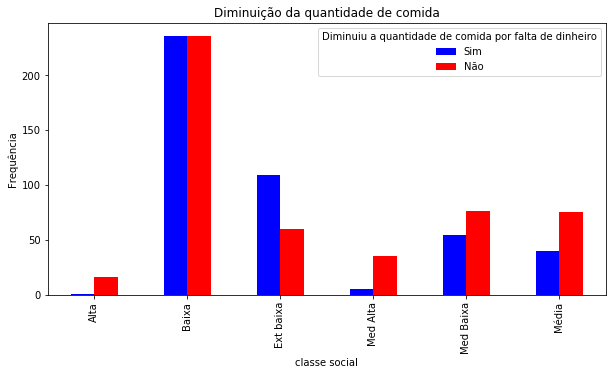

In [36]:
graf6 = tab6
graf6.plot (kind='bar', color=('blue','red'),figsize=(10,5))
plt.title('Diminuição da quantidade de comida')
plt.ylabel('Frequência')

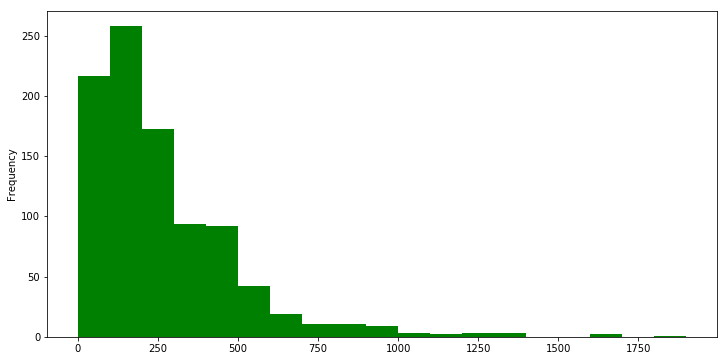

In [22]:
renda = dadosPI["Renda mensal domiciliar per capita"]
renda.plot (kind='hist', color=("green"),  bins=range(0,2000,100), figsize=(12,6))

___
## Conclusão 

Analisando os graficos e tabelas gerados podemos tirar diversas conclusões sobre a alimentação das familias no Piaui. Mesmo sendo de classe alta algumas familias ficaram sem dinheiro para ter uma alimentação saudável. No grafico de "Geladeiras" observamos que uma familia de classe alta não tem geladeira e 13 de 17 não tem frezeer. Isso aponta uma falta de planejamento com a comida até mesmo entre os ricos. Entre as classes mais baixas esse problema só tende a aumentar, 96.3% da população não possui frezeer, ou seja não congela resto de alimentos nem estoca alimentos, para durar mais de uma semana. Percebesse também uma preocupação que o alimento acabe antes de comprar mais, o que pode ser um problea, ja que podem haver alimentos em falta impedindo a compra dos alimentos necessarios para uma alimentação saudavel. Percebesse que algumas familias das classes mais altas, apesar de não planejarem a alimentação, não encontram problemas para terem uma vida alimentar saudável, predominando o seu poder de compra, mas ao mesmo tempo uma parte menor dessas familias, não planejam sua alimentação e acabam sofrendo para se alimentarem de forma saudável. Assim como algumas poucas familias de renda menor conseguem se alimentar de forma saudável por terem um planejamento de compra e consumo dos alimentos.